# Рабочая тетрадь 4

In [18]:
import numpy as np
x = np.array([0, 1, 2, 3])
y = np.array([-1, 0.2, 0.9, 2.1])

#Перепишем линейное уравнение y = mx + c как y = Ap, где A = [[ x 1]] и p = [[m], [c]]
#Построим A по x :

A  = np.vstack([x, np.ones(len(x))]).T
A

array([[0., 1.],
       [1., 1.],
       [2., 1.],
       [3., 1.]])

In [19]:
#Используем метод lstsq для решения его относительно вектора p.
m, c = np.linalg.lstsq(A, y, rcond = None)[0]
print(m, c)

0.9999999999999997 -0.949999999999999


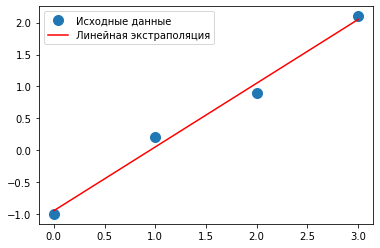

In [20]:
#Построим график полученной прямой и укажем на нем точки.
import matplotlib.pyplot as plt
plt.plot(x, y, 'o', label = 'Исходные данные', markersize = 10)
plt.plot(x, m*x + c, 'r', label = 'Линейная экстраполяция')
plt.legend()
plt.show()

1.1.2 Пример
Пусть 𝑥, 𝑦 – вектора длиной 𝑛 > 3 (точек > 3). Задача заключается в
построении эстраполяционного полинома второго порядка (параболы). Таким
образом, необходимо найти такие коэффициенты полинома 𝑎, 𝑏, 𝑐 по методу
наименьших квадратов. Данные могут быть получены в результате
измерений. Покажем пример генерации данных случайным образом и
загрузки их из файла.

In [21]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 1.0
x = linspace(-5,5,11)
y = x**2+delta*(rand(11)-0.5)
x += delta*(rand(11)-0.5)

#записывает данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-5.48256602 -3.86761513 -3.00095074 -2.0946362  -1.3299068  -0.48574682
  1.28345092  1.90622685  2.5024368   3.77068392  5.42187964]
[25.31072894 15.85673406  8.78909508  3.84230648  1.14561622  0.24061144
  0.54479455  3.9701033   9.34085657 15.73653451 24.63564784]


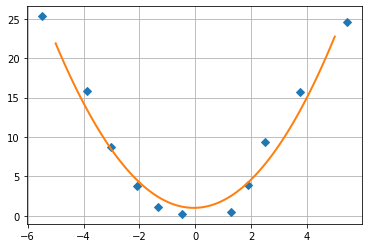

In [22]:
#Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов 
#задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
#рисуем точки 
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

1.1.3 Пример
По данным предыдущего примера постройте эстраполяционного полинома
третьего порядка

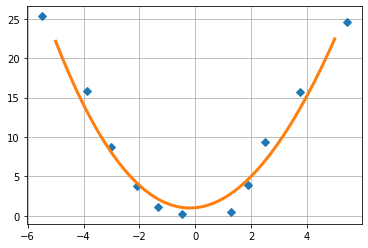

In [23]:
#Решение
#Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
#задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(11))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-5,5]
x_prec = linspace(-5, 5, 101)
#рисуем точки 
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^3 + bx^2 +cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3],'-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

Задание
Представьте собственные данные и постройте эктраполяцию полиномами
первой, второй и третьей степени.

In [1]:
from numpy import *
from numpy.random import *
#генерируем случайные x и y
delta = 2
x = linspace(-6,6,18)
y = x**2+delta*(rand(18)-0.5)
x += delta*(rand(18)-0.5)

#записывает данные в файл
x.tofile('x_data.txt', '\n')
y.tofile('y_data.txt', '\n')

#читаем данные из файлов
x = fromfile('x_data.txt', float, sep='\n')
y = fromfile('y_data.txt', float, sep='\n')

print(x)
print(y)

[-6.72708662 -4.29730771 -4.01215164 -4.19785941 -2.97986567 -1.48457743
 -2.35178106 -1.76363406 -1.25707345 -0.47369772  0.15132064  1.71737383
  1.90008584  2.88046536  3.14193157  4.13291281  4.82365678  6.15255652]
[35.33105232 27.56980817 20.38592844 15.45306954 10.14236237  5.31157612
  2.58090728  0.78339686 -0.71258975  0.45875716  1.06020233  3.53256224
  5.92816885 10.18115271 15.38528442 20.05553411 29.00968951 35.37488546]


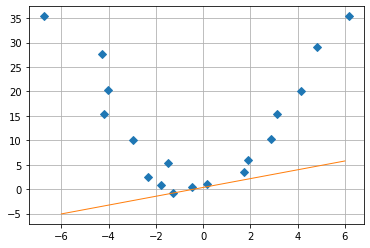

In [4]:
import numpy as np
import matplotlib.pyplot as plt
#Нахождение коэффициентов функции вида y = ax + b методом наименьших квадратов 
#задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(18))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-6,6]
x_prec = linspace(-6, 6, 101)
#рисуем точки 
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1]
plt.plot(x_prec, s[0] * x_prec + s[1],'-', lw=1)
plt.grid()
plt.savefig('полином 1-й степени.png')

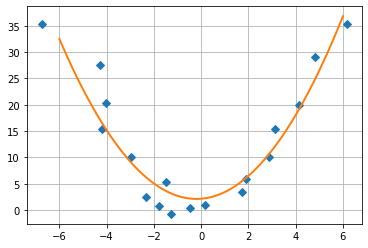

In [3]:
#Нахождение коэффициентов функции вида y = ax^2 + bx + c методом наименьших квадратов 
#задаем вектор m = [x**2, x, E]
m = vstack((x**2, x, ones(18))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-6,6]
x_prec = linspace(-6, 6, 101)
#рисуем точки 
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^2 + bx + c, подставляя из решения коэффициенты s[0], s[1], s[2]
plt.plot(x_prec, s[0] * x_prec**2 + s[1] * x_prec+s[2],'-', lw=2)
plt.grid()
plt.savefig('парабола.png')

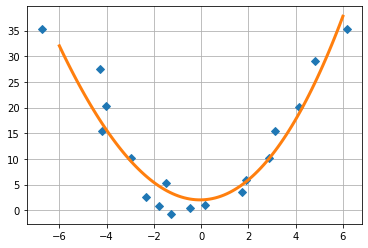

In [5]:
#Нахождение коэффициентов функции вида y = ax^3 + bx^2 + cx + d методом наименьших квадратов
#задаем вектор m = [x**3, x, E]
m = vstack((x**3, x**2, x, ones(18))).T
#находим коэффициенты при составляющих вектора m
s = np.linalg.lstsq(m, y, rcond = None)[0]

#на отрезке [-6,6]
x_prec = linspace(-6, 6, 101)
#рисуем точки 
plt.plot(x, y, 'D')
#рисуем кривую вида y = ax^3 + bx^2 +cx + d, подставляя из решения коэффициенты s[0], s[1], s[2], s[3]
plt.plot(x_prec, s[0] * x_prec**3 + s[1] * x_prec**2 + s[2] * x_prec + s[3],'-', lw=3)
plt.grid()
plt.savefig('полином 3-й степени.png')

1.1.4 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривую вида 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑒xp(−𝑏2𝑥^2)

In [1]:
import numpy as np
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 +  b1 * np.exp(-b2 * x**2)
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создаем теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
# зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))

In [3]:
#Используем функцию для получения решения в виде коэффициентов функции f(x) для указанных xdata и ydata
from scipy.optimize import curve_fit
import scipy as sp
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
beta_opt

array([0.25084602, 0.72904786, 0.45917393])

In [4]:
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

0.00020120738571875442
0.10397496642536586


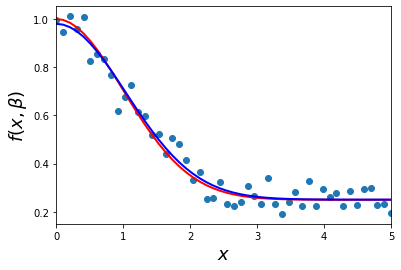

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [7]:
print(xdata)
print(ydata)

[0.         0.10204082 0.20408163 0.30612245 0.40816327 0.51020408
 0.6122449  0.71428571 0.81632653 0.91836735 1.02040816 1.12244898
 1.2244898  1.32653061 1.42857143 1.53061224 1.63265306 1.73469388
 1.83673469 1.93877551 2.04081633 2.14285714 2.24489796 2.34693878
 2.44897959 2.55102041 2.65306122 2.75510204 2.85714286 2.95918367
 3.06122449 3.16326531 3.26530612 3.36734694 3.46938776 3.57142857
 3.67346939 3.7755102  3.87755102 3.97959184 4.08163265 4.18367347
 4.28571429 4.3877551  4.48979592 4.59183673 4.69387755 4.79591837
 4.89795918 5.        ]
[0.99698859 0.94758074 1.01124214 0.95749445 1.01007037 0.82378031
 0.85409204 0.83469931 0.76770371 0.61985126 0.67793206 0.7282011
 0.61305329 0.59773618 0.52026971 0.523638   0.44082169 0.50746399
 0.47962023 0.41664667 0.3308197  0.3643408  0.2515579  0.2588464
 0.32534008 0.23233939 0.22369089 0.2407747  0.30930775 0.26724514
 0.23339163 0.34073959 0.2336214  0.19155274 0.24085605 0.28036985
 0.22316113 0.32771949 0.22590026 0.2937

1.1.5 Пример
Необходимо проверить гипотезу, что наши точечно заданная функция ложится
на кривые вида:
1) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥
2) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑥 + 𝑏2𝑥2
3) 𝑓(𝑥, 𝑏) = 𝑏0 + 𝑏1𝑙𝑛(𝑥)
4) 𝑓(𝑥, 𝑏) = 𝑏0 𝑥^𝑏1

In [8]:
#решение 
#1
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75)
beta = (0.25, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.27214849 0.74476564]
0.00011930269849603288
0.10490409747709134


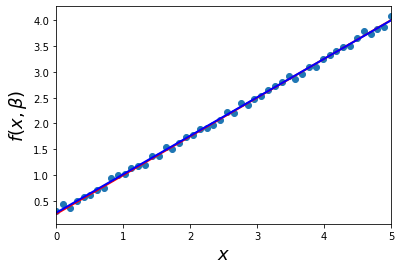

In [9]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [10]:
#решение 
#2
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.25, 0.75, 0.5)
beta = (0.25, 0.75, 0.5)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 5, 50)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.28775424 0.71968809 0.50500744]
0.00014679306268681937
0.12241004931597599


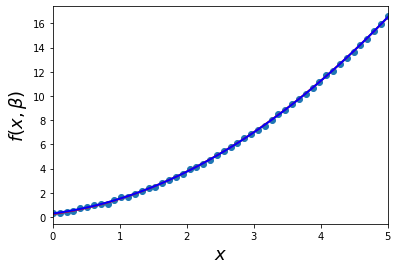

In [11]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [12]:
#решение 
#3
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.96163149 2.03175125]
3.742871098449859e-05
0.08655170258053732


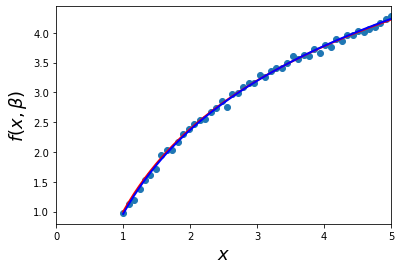

In [13]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

In [14]:
#решение 
#4
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (1, 2)
beta = (1, 2)
def f(x, b0, b1):
    return b0 + x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 5, 50)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.98460016 2.00025396]
9.329645612164682e-05
0.10405685416553093


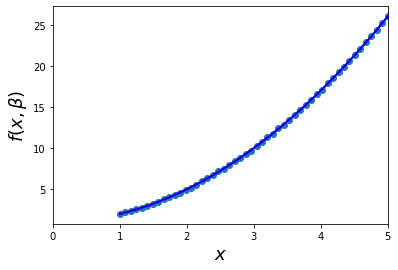

In [15]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=18)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=18)
plt.show()

Задание
Подставьте собственные данные и поэкспериментируйте с представленными
функциями. Проанализируйте динамику изменения данных.

In [7]:
#решение 
#1
from scipy.optimize import curve_fit
import scipy as sp
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.5, 0.75)
beta = (0.5, 0.75)
def f(x, b0, b1):
    return b0 + b1 * x
#зададим массив точек xi
xdata = np.linspace(0, 10, 100)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.08 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.49744069 0.74993975]
0.00020835219985913307
0.6090579085065014


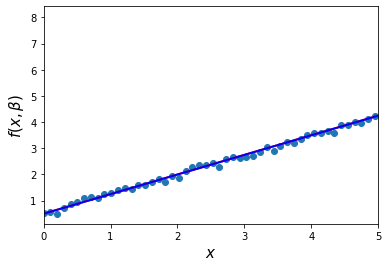

In [8]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=15)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=15)
plt.show()

In [9]:
#решение 
#2
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (0.53, 0.75, 0.59)
beta = (0.53, 0.75, 0.59)
def f(x, b0, b1, b2):
    return b0 + b1 * x + b2 * x * x
#зададим массив точек xi
xdata = np.linspace(0, 10, 100)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.10 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[0.51698091 0.75727402 0.58962997]
0.0006505882499560738
1.1489524084212406


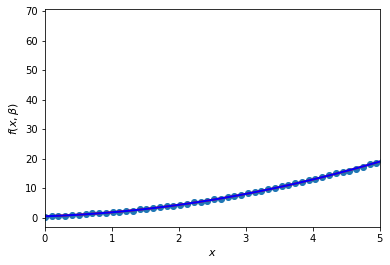

In [11]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=11)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=11)
plt.show()

In [12]:
#решение 
#3
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (4, 8)
beta = (4, 8)
def f(x, b0, b1):
    return b0 + b1 * np.log(x)
#зададим массив точек xi
xdata = np.linspace(1, 10, 100)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.05 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[4.01089211 7.99520507]
8.328569582536002e-05
0.2391909542934898


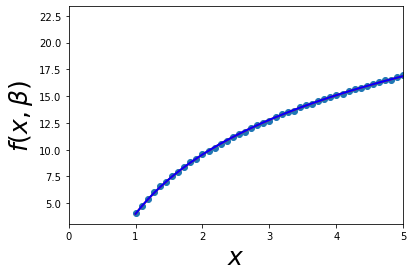

In [13]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=25)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=25)
plt.show()

In [14]:
#решение 
#4
#Добавим шума в данные, сделанные по функции f(x, b) с коэффициентами b = (3, 2)
beta = (3, 2)
def f(x, b0, b1):
    return b0 + x ** b1
#зададим массив точек xi
xdata = np.linspace(1, 10, 100)
#создадим теоретически правильные значения точек yi (без шума)
y = f(xdata, *beta)
#зашумляем эти данные
ydata = y + 0.14 * np.random.randn(len(xdata))
beta_opt, beta_cov = sp.optimize.curve_fit(f, xdata, ydata)
print(beta_opt)
#Вычислим линейное отклонение 
lin_dev = sum(beta_cov[0])
print(lin_dev)

#Вычислим квадратичное отклонение 
residuals = ydata - f(xdata, *beta_opt)
fres = sum(residuals**2)
print(fres)

[2.98567396 2.00024645]
0.00042382284635064
1.9496307265065422


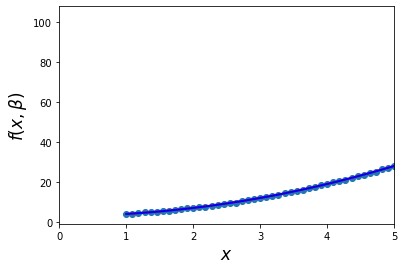

In [15]:
fig, ax = plt.subplots()
ax.scatter(xdata, ydata)
ax.plot(xdata, y, 'r', lw=2)
ax.plot(xdata, f(xdata, *beta_opt), 'b', lw=2)
ax.set_xlim(0, 5)
ax.set_xlabel(r"$x$", fontsize=17)
ax.set_ylabel(r"$f(x, \beta)$", fontsize=17)
plt.show()

1.2.1 Пример
Построим простую линейную регрессию в Python с использованием
библиотеки scikit-learn

In [16]:
#Импортируем необходимые библиотеки
#Используем pandas и numpy для обработки данных,
#matplotlib для визуализации и sklearn для обучения наборов данных и импорта моделей.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#создадим набор данных для описания взаимосвязи между временем обучения студентов и успеваемостью
my_dict = {'Учебное время': [0.50,0.75,1.00,1.25,1.50,1.75,1.75,2.00,2.25,2.50,2.75,3.00,3.25,3.50,4.00,4.25,4.50,4.75,5.00,5.50],
            'Оценка': [10,22,13,43,20,22,33,50,62,48,55,75,62,73,81,76,64,82,90,93]}
dataset = pd.DataFrame(my_dict)
dataset.head()

,Учебное время,Оценка
0,0.50,10
1,0.75,22
2,1.00,13
3,1.25,43
4,1.50,20


In [18]:
#Исследуем набор данных
print(dataset.shape)
dataset.describe()

(20, 2)


,Учебное время,Оценка
count,20.000000,20.000000
mean,2.787500,53.700000
std,1.507165,26.435821
min,0.500000,10.000000
25%,1.687500,30.250000
50%,2.625000,58.500000
75%,4.062500,75.250000
max,5.500000,93.000000


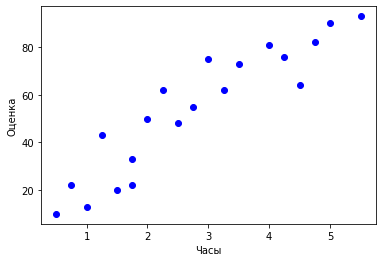

In [19]:
#Нарисуем точечную диаграмму
plt.scatter (dataset['Учебное время'], dataset['Оценка'], color = 'b', label = "данные экзамена")
plt.xlabel("Часы")
plt.ylabel("Оценка")
plt.show()

После того как мы получили представление о данных, разделим информацию
на «атрибуты» и «метки». Атрибуты – это независимые переменные, а метки
– это зависимые переменные, значения которых должны быть предсказаны. В
нашем наборе всего два столбца и необходимо предсказать оценку в
зависимости от количества часов. Чтобы извлечь атрибуты и метки,
выполните следующий скрипт:

In [20]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 1].values
print(X)
print(y)

[[0.5 ]
 [0.75]
 [1.  ]
 [1.25]
 [1.5 ]
 [1.75]
 [1.75]
 [2.  ]
 [2.25]
 [2.5 ]
 [2.75]
 [3.  ]
 [3.25]
 [3.5 ]
 [4.  ]
 [4.25]
 [4.5 ]
 [4.75]
 [5.  ]
 [5.5 ]]
[10 22 13 43 20 22 33 50 62 48 55 75 62 73 81 76 64 82 90 93]


In [21]:
#Теперь, когда у нас есть атрибуты и метки, необходимо раделить их на обучающий и тестовый наборы.
#Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [22]:
#далее можно обучить алгоритм линейной регрессии 
#необходимо импортировать класс LinearRegression, создать его экземпляр и вызвать метод fit()
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Получившийся результат можно интерпретировать следующим образом: с
каждым затраченным часом на обучение результат экзамена повышается
приблизительно на 17 баллов. Далее можно построить прогнозы. Для этого мы
будем использовать наши тестовые данные и посмотрим, насколько точно наш
алгоритм предсказывает процентную оценку. Чтобы сделать прогноз на
тестовых данных необходимо выполнить следующий код:

In [23]:
y_pred = regressor.predict(X_test)
#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,90,90.610737
1,22,18.245701
2,93,99.124271
3,62,43.786302


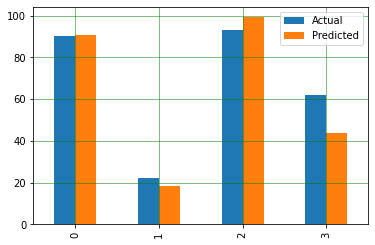

In [24]:
#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

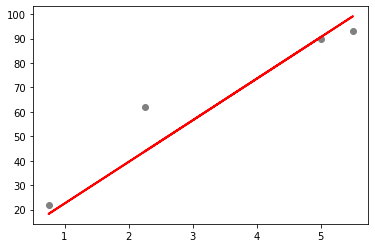

In [25]:
#построим линию регрессии с тестовыми данными
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color= 'red', linewidth=2)
plt.show()

Задание.
Постройте модель линейной регрессии для произвольных данных из двух
столбцов. Для примера можно взять точечную зависимость заработной платы от
опыта работы:
(https://raw.githubusercontent.com/AnnaShestova/salary-years-simple-linearregression/master/Salary_Data.csv).
Найдите коэффициенты линии регрессии. Постройте прогноз.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Вторым шагом определите данные, с которыми предстоит работать. 
#Входы (регрессоры, x) и выход (предиктор, y) должны быть массивами (экземпляры класса numpy.ndarray) или похожими объектами. 
x = np.array([1.1, 1.3, 1.5, 2.0, 2.2, 2.9, 3.0, 3.2, 3.2, 3.7, 3.9, 4.0, 4.0, 4.1, 4.5, 4.9, 5.1, 5.3, 5.9, 6.0, 6.8, 7.1, 7.9, 8.2, 8.7, 9.0, 9.5, 9.6, 10.3, 10.5]).reshape((-1, 1))
y = np.array([39343.00, 46205.00, 37731.00, 43525.00, 39891.00, 56642.00, 60150.00, 54445.00, 64445.00, 57189.00, 63218.00, 55794.00, 56957.00, 57081.00, 61111.00, 67938.00, 66029.00, 83088.00, 81363.00, 93940.00, 91738.00, 98273.00, 101302.00, 113812.00, 109431.00, 105582.00, 116969.00, 112635.00, 122391.00, 121872.00])
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343.  46205.  37731.  43525.  39891.  56642.  60150.  54445.  64445.
  57189.  63218.  55794.  56957.  57081.  61111.  67938.  66029.  83088.
  81363.  93940.  91738.  98273. 101302. 113812. 109431. 105582. 116969.
 112635. 122391. 121872.]


In [3]:
#Теперь, когда у нас есть атрибуты и метки, необходимо раделить их на обучающий и тестовый наборы.
#Приведенный фрагмент разделяет 80% данных на обучающий набор, а 20% данных - на набор тестов
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [4]:
#создаем модель 
#делаем экземпляр класса LinearRegression
model = LinearRegression()
#С помощью .fit() вычисляются оптимальные значение весов b₀ и b₁, 
#используя существующие вход и выход (x и y) в качестве аргументов. 
#Другими словами, .fit() совмещает модель. 
model.fit(x_train, y_train)

LinearRegression()

In [5]:
y_pred = model.predict(x_test)
#сравним фактические значения с прогнозируемыми
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,37731.0,40748.961841
1,122391.0,122699.622956
2,57081.0,64961.657170
3,63218.0,63099.142145
4,116969.0,115249.562855
5,109431.0,107799.502753


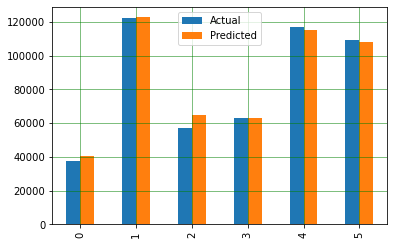

In [6]:
#визуализируем результат сравнения в виде гистограммы
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

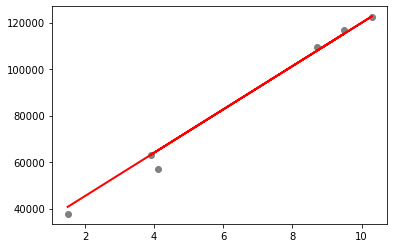

In [7]:
#построим линию регрессии с тестовыми данными
plt.scatter(x_test, y_test, color='gray')
plt.plot(x_test, y_pred, color= 'red', linewidth=2)
plt.show()

In [8]:
#получаем результат, используем R^2
>>> r_sq = model.score(x, y)
>>> print('coefficient of determination:', r_sq)

coefficient of determination: 0.9566628347576891


In [9]:
#предсказываем ответ 
>>> y_pred = model.predict(x)
>>> print('predicted response:', y_pred, sep='\n')

predicted response:
[ 37023.93179003  38886.44681538  40748.96184072  45405.24940409
  47267.76442943  53786.56701814  54717.82453082  56580.33955616
  56580.33955616  61236.62711953  63099.14214487  64030.39965754
  64030.39965754  64961.65717022  68686.68722091  72411.7172716
  74274.23229695  76136.74732229  81724.29239833  82655.549911
  90105.61001239  92899.38255041 100349.44265179 103143.21518981
 107799.50275317 110593.27529119 115249.56285456 116180.82036723
 122699.62295594 124562.13798128]


1.3.1 Пример 
Для решения задачи множественной регрессии можно задействовать уже
известный метод numpy.linalg.lstsq.

In [26]:
import numpy as np

y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]
X = np.transpose(X) #transpose so input vectors
X = np.c_[X, np.ones(X.shape[0])] # add bias term
linreg = np.linalg.lstsq(X, y, rcond=None)[0]
print(linreg)

[ 0.1338682   0.26840334 -0.02874936  1.5122571 ]


1.3.2 Пример
Для данных из предыдущей задачи построить модель множественной
линейной регрессии с использованием средств библиотеки sсikit-learn.

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

In [30]:
y = [1,2,3,4,3,4,5,3,5,5,4,5,4,5,4,5,6,0,6,3,1,3,1]
X = [[0,2,4,1,5,4,5,9,9,9,3,7,8,8,6,6,5,5,5,6,6,5,5],
     [4,1,2,3,4,5,6,7,5,8,7,8,7,8,7,8,6,8,9,2,1,5,6],
     [4,1,2,5,6,7,8,9,7,8,7,8,7,4,3,1,2,3,4,1,3,9,7]]

#Формирует DataFrame из 2-х списков 
new_y = np.array(y)
new_y = new_y.transpose()
df1 = pd.DataFrame(new_y)
new_X = np.array(X)
new_X = new_X.transpose()
df2 = pd.DataFrame(new_X)
df1 = df1.rename(columns = {0: 'y'}, inplace = False)
df2 = df2.rename(columns = {0: 'x1', 1: 'x2', 2: 'x3'}, inplace = False)

frames = [df1, df2]
dataset = pd.concat([df1, df2], axis=1, join='inner')
dataset.head()

,y,x1,x2,x3
0,1,0,4,4
1,2,2,1,1
2,3,4,2,2
3,4,1,3,5
4,3,5,4,6


In [31]:
#изучим данные 
print(dataset.shape)
dataset.describe()

(23, 4)


,y,x1,x2,x3
count,23.000000,23.000000,23.000000,23.000000
mean,3.565217,5.347826,5.521739,5.043478
std,1.674029,2.404706,2.428422,2.704849
min,0.000000,0.000000,1.000000,1.000000
25%,3.000000,4.500000,4.000000,3.000000
50%,4.000000,5.000000,6.000000,5.000000
75%,5.000000,6.500000,7.500000,7.000000
max,6.000000,9.000000,9.000000,9.000000


In [32]:
#разелим данные на метки и атрибуты
X = dataset[['x1', 'x2', 'x3']]
y = dataset['y']

In [33]:
#разделим данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =0)

In [34]:
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [35]:
#выведем коэффициенты модели
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
x1,0.223219
x2,0.136709
x3,-0.063757


In [36]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
11,5,4.119478
10,4,3.153648
21,3,3.199155
14,4,4.078333
20,1,3.258079


In [37]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 1.3272699242343065


Задание.
Постройте модель множественной линейной регрессии для произвольных
данных из нескольких столбцов. Для примера можно взять потребления
газа (в миллионах галлонов) в 48 штатах США или набор данных о
качестве красного вина (1) и (2) соответственно. Найдите коэффициенты
множественной регрессии. Постройте прогноз. 
1.
https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/pe
trol_consumption.csv
2. https://raw.githubusercontent.com/aniruddhachoudhury/Red-WineQuality/master/winequality-red.csv

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
file = "winequality-red.csv"
data = pd.read_csv(file)
x = data[['pH', 'density',  'alcohol']]
y = data['quality']
#x = dataset[['fixed acidity',  'volatile acidity',  'citric acid',  'residual sugar',  'chlorides', 'free sulfur dioxide',  'total sulfur dioxide',  'density',    'pH',  'sulphates', 'alcohol']]

In [26]:
new_y = np.array(y)
new_y = new_y.transpose()
dfy = pd.DataFrame(new_y)
new_x = np.array(x)
dfx = pd.DataFrame(new_x)

dfy = dfy.rename(columns = {0: 'quality'}, inplace = False)
dfx = dfx.rename(columns = {0: 'pH', 1: 'density',  2: 'alcohol'}, inplace = False)

frames = [dfy, dfx]
dataset = pd.concat([dfy, dfx], axis=1, join="inner")
dataset.head()

,quality,pH,density,alcohol
0,5,3.51,0.9978,9.4
1,5,3.20,0.9968,9.8
2,5,3.26,0.9970,9.8
3,6,3.16,0.9980,9.8
4,5,3.51,0.9978,9.4


In [27]:
#изучим данные 
print(dataset.shape)
dataset.describe()

(1599, 4)


,quality,pH,density,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000
mean,5.636023,3.311113,0.996747,10.422983
std,0.807569,0.154386,0.001887,1.065668
min,3.000000,2.740000,0.990070,8.400000
25%,5.000000,3.210000,0.995600,9.500000
50%,6.000000,3.310000,0.996750,10.200000
75%,6.000000,3.400000,0.997835,11.100000
max,8.000000,4.010000,1.003690,14.900000


In [28]:
#разелим данные на метки и атрибуты
X = dataset[['pH', 'density',  'alcohol']]
y = dataset['alcohol']

In [29]:
#разделим данные на обучающую и тестовую выборки
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state =0)
#для обучения алгоритма мы выполняем тот же код, что и раньше, используя метод fit() класса LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
#выведем коэффициенты модели
coeff_df = pd.DataFrame(model.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
pH,1.021336e-15
density,2.469450e-13
alcohol,1.000000e+00


In [30]:
#Чтобы сделать прогнозы на тестовых данных, выполните следующий код
y_pred = model.predict(x_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
1109,10.8,10.8
1032,9.6,9.6
1002,11.7,11.7
487,10.0,10.0
979,10.4,10.4
...,...,...
794,12.5,12.5
813,11.4,11.4
1322,11.4,11.4
704,9.7,9.7


In [31]:
#Последний шаг - оценить производительность алгоритма. Мы сделаем это, найдя значения для MSE
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))

Mean Squared Error: 2.7314308843277533e-30


Задание*
Задача: Экспериментально получены N − значений величины Y при
различных значениях величины X. Определить коэффициенты полиномов
первой и второй степени, аппроксимирующих результаты эксперимента, с
применением метода наименьших квадратов. Вычислить СКО. Расчеты
проводятся вручную с указанием формул, применяемых для определения
коэффициентов и подробных расчетов (сдаются на листке преподавателю,
письменный опрос). В тетрадке Jupyter Notebook решение реализуется
методами на усмотрение студента.
Вариант выбирается по последней цифре номера студенческого билета.
Если номер заканчивается на 1, то вариант 1, на ноль – вариант 10.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import DataFrame, Series
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from numpy import *
from numpy.random import *

In [5]:
x = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0]
y = [5.0, 5.0, 4.0, 4.0, 6.0, 6.0]

1.142857142857142 4.428571428571426
5.3571428571428585 -4.21428571428572 5.142857142857146


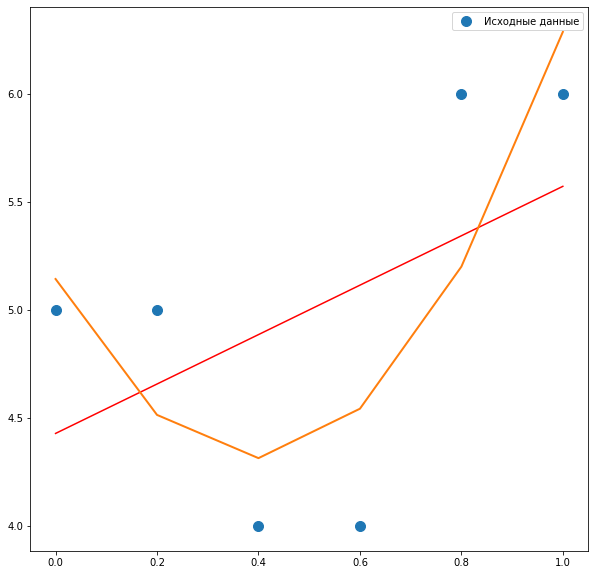

In [6]:
# Построим полиномs 1-ой степени (y = mx + c) и 2-ой степени (y = s0 * x**2 + s_1 * x + s_0)
x = np.array(x)
y = np.array(y)
A_1 = np.vstack([x, np.ones(len(x))]).T # Для полинома 1ой степени
A_2 = vstack((x**2, x, ones(len(x)))).T # Для полинома 2ой степени
# Используем метод lstsq
m, c = np.linalg.lstsq(A_1, y, rcond = None)[0]
s = np.linalg.lstsq(A_2, y, rcond=None)[0]
print(m, c)
print(s[0], s[1], s[2])
# Построим график полученной прямой и укажем на нем точки
plt.figure(figsize=(10,10))
plt.plot(x, y, 'o', label='Исходные данные', markersize=10)
plt.plot(x, m*x + c, 'r')
plt.plot(x, s[0] * x**2 + s[1] * x + s[2], '-', lw=2)
plt.legend()
plt.show()

In [7]:
# Вычислим СКО
x_y = {"x": x, "y":y}
dataset = pd.DataFrame(x_y)
dataset.head()

,x,y
0,0.0,5.0
1,0.2,5.0
2,0.4,4.0
3,0.6,4.0
4,0.8,6.0


In [9]:
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,1].values
print(x)
print(y)
# Теперь разделим атрибуты и метки на обучающий и тестовый наборы
# 80% на обучающий набор, а 20% - на набор для тестов
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

[[0. ]
 [0.2]
 [0.4]
 [0.6]
 [0.8]
 [1. ]]
[5. 5. 4. 4. 6. 6.]


In [10]:
# Далее обучим алгоритм линейной регрессии
regressor = LinearRegression()
regressor.fit(X_train, y_train)
# Приведем получившиеся коэффициенты для линии регрессии
print(regressor.intercept_)
print(regressor.coef_)
m_fit = LinearRegression().fit(X_train, y_train)
m_predict = m_fit.predict(X_test)
MAE = metrics.mean_squared_error(y_test, m_predict)
print(f"СКО = {MAE}")

4.8
[0.5]
СКО = 0.7450000000000001
